# Data Visualization

### The Challenger: An Information Disaster

You are in charge of a space shuttle launch that takes off tomorrow morning. Engineers have collected data on O-Ring failures and deduced that the critical factor for a successful mission is the temperature at time of the launch. The engineers are trying to communicate their findings in a way that will be digestible for you, the decision maker, and come up with the following visualization:

<img src="vis1.jpeg" alt="Drawing" style="width: 600px;"/>

Knowing that the forecast temperature for tomorrow is 26-29 degrees Fahrenheit, do you approve the space shuttle launch?

In [ ]:
%matplotlib inline
import warnings
import matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Lets extract the original data from the visualization as (temp, damage_index) instances.

In [ ]:
data = [[53, 11], [57, 4], [58, 4], [63, 2], [66, 0], [67, 0],  
        [67, 0],  [67, 0], [68, 0], [69, 0], [70, 4], [70, 0], 
        [70, 4],  [70, 0], [72, 0], [73, 0], [75, 0], [75, 4], 
        [76, 0],  [76, 0], [78, 0], [79, 0], [81, 0]]

data = np.array(data)

Plotting points on the x-y plane is done by the method `scatter`. We will address the rest of the syntax later on.

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1])
ax.set_xlabel('Temperature')
ax.set_ylabel("Damage Index")

If you are familiar with `Pandas`, the same plot can be achieved by operating on a dataframe. We will focus on explicit methods for the rest of the class.

In [ ]:
# The same plot using pandas.
df = pd.DataFrame(data, columns=['Temperature', 'Damage Index'])
ax = df.plot.scatter(0,1)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1])
ax.axvline(26, c='r')
###
# Add a vertical line on 29
ax.axvline(29, c='g')
#
###
ax.set_xlabel('Temperature')
ax.set_ylabel("Damage Index")

We can use Seaborn to easily add a linear trendline.

In [ ]:
fig, ax = plt.subplots()
xlim = [0,100]
ax.set_xlim(xlim)
ax = sns.regplot(data[:,0], data[:,1], fit_reg=True)
ax.axvline(26, c='r')
ax.axvline(29, c='g')
ax.set_xlabel('Temperature')
ax.set_ylabel("Damage Index")

In [ ]:
fig, ax = plt.subplots()
xlim = [0,100]
ax.set_xlim(xlim)
ax = sns.regplot(data[:,0], data[:,1], fit_reg=True, order=2)
ax.axvline(26, c='r')
ax.axvline(29, c='g')
ax.set_xlabel('Temperature')
ax.set_ylabel("Damage Index")

In [ ]:
fig, ax = plt.subplots()
xlim = [0,100]
ax.set_xlim(xlim)
ax = sns.regplot(data[:,0], data[:,1], fit_reg=True, order=4)
ax.axvline(26, c='r')
ax.axvline(29, c='g')
ax.set_xlabel('Temperature')
ax.set_ylabel("Damage Index")

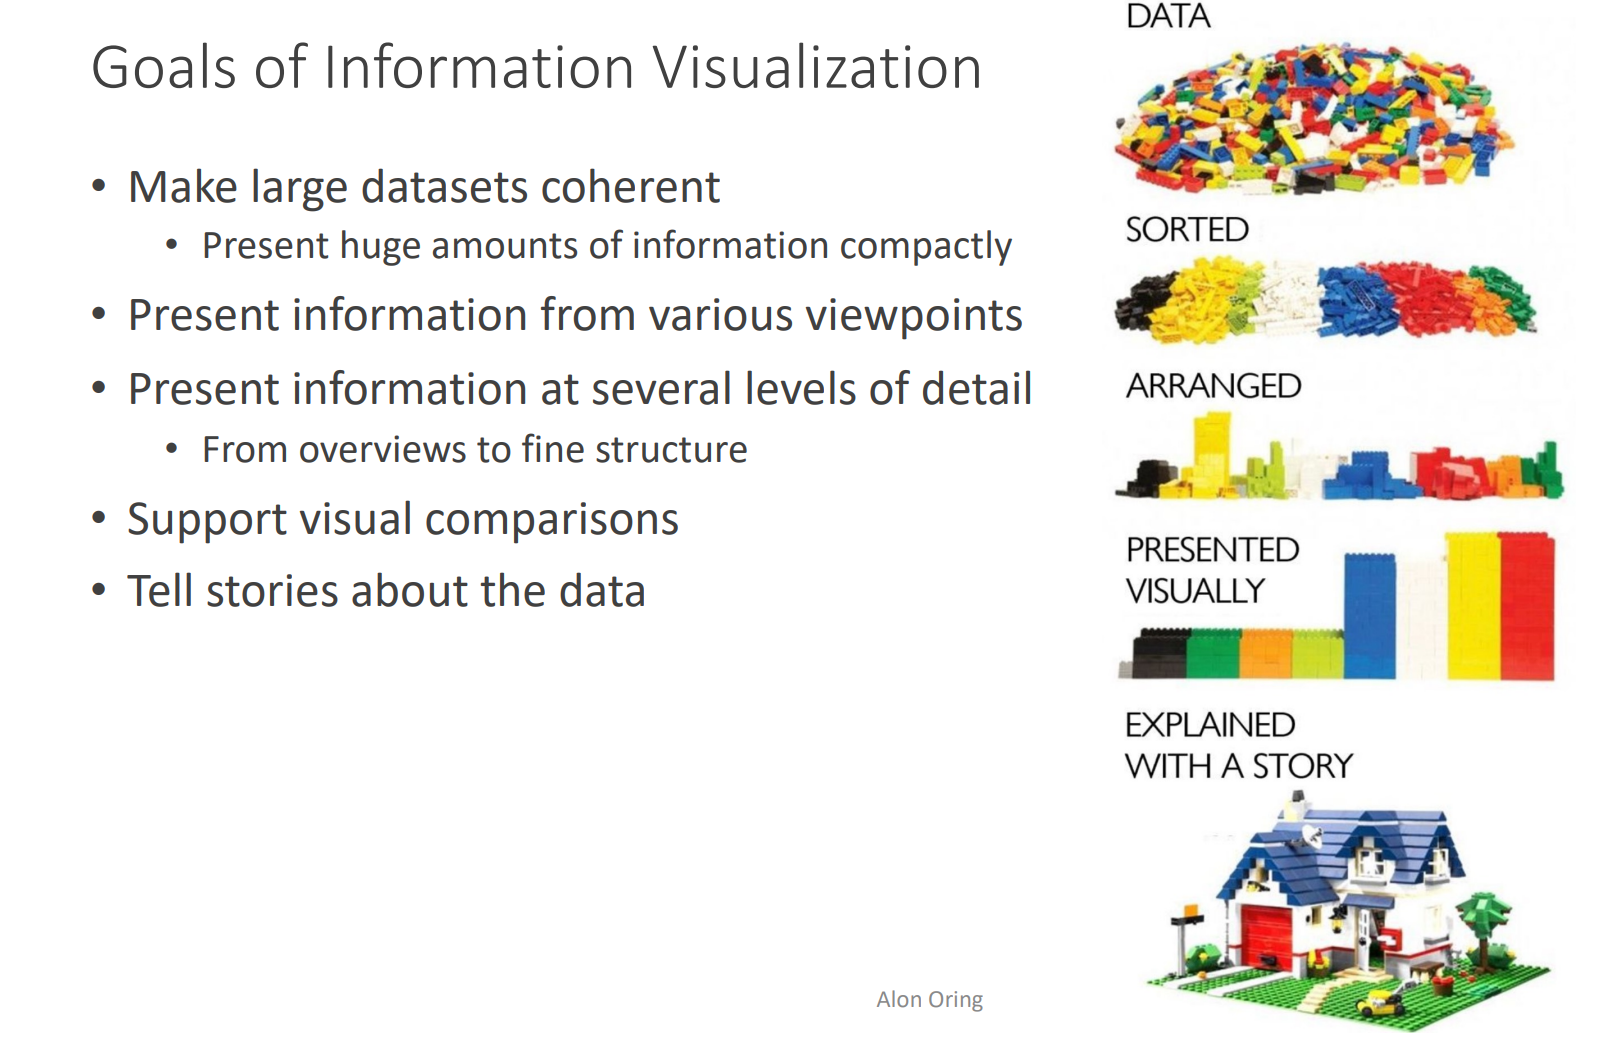

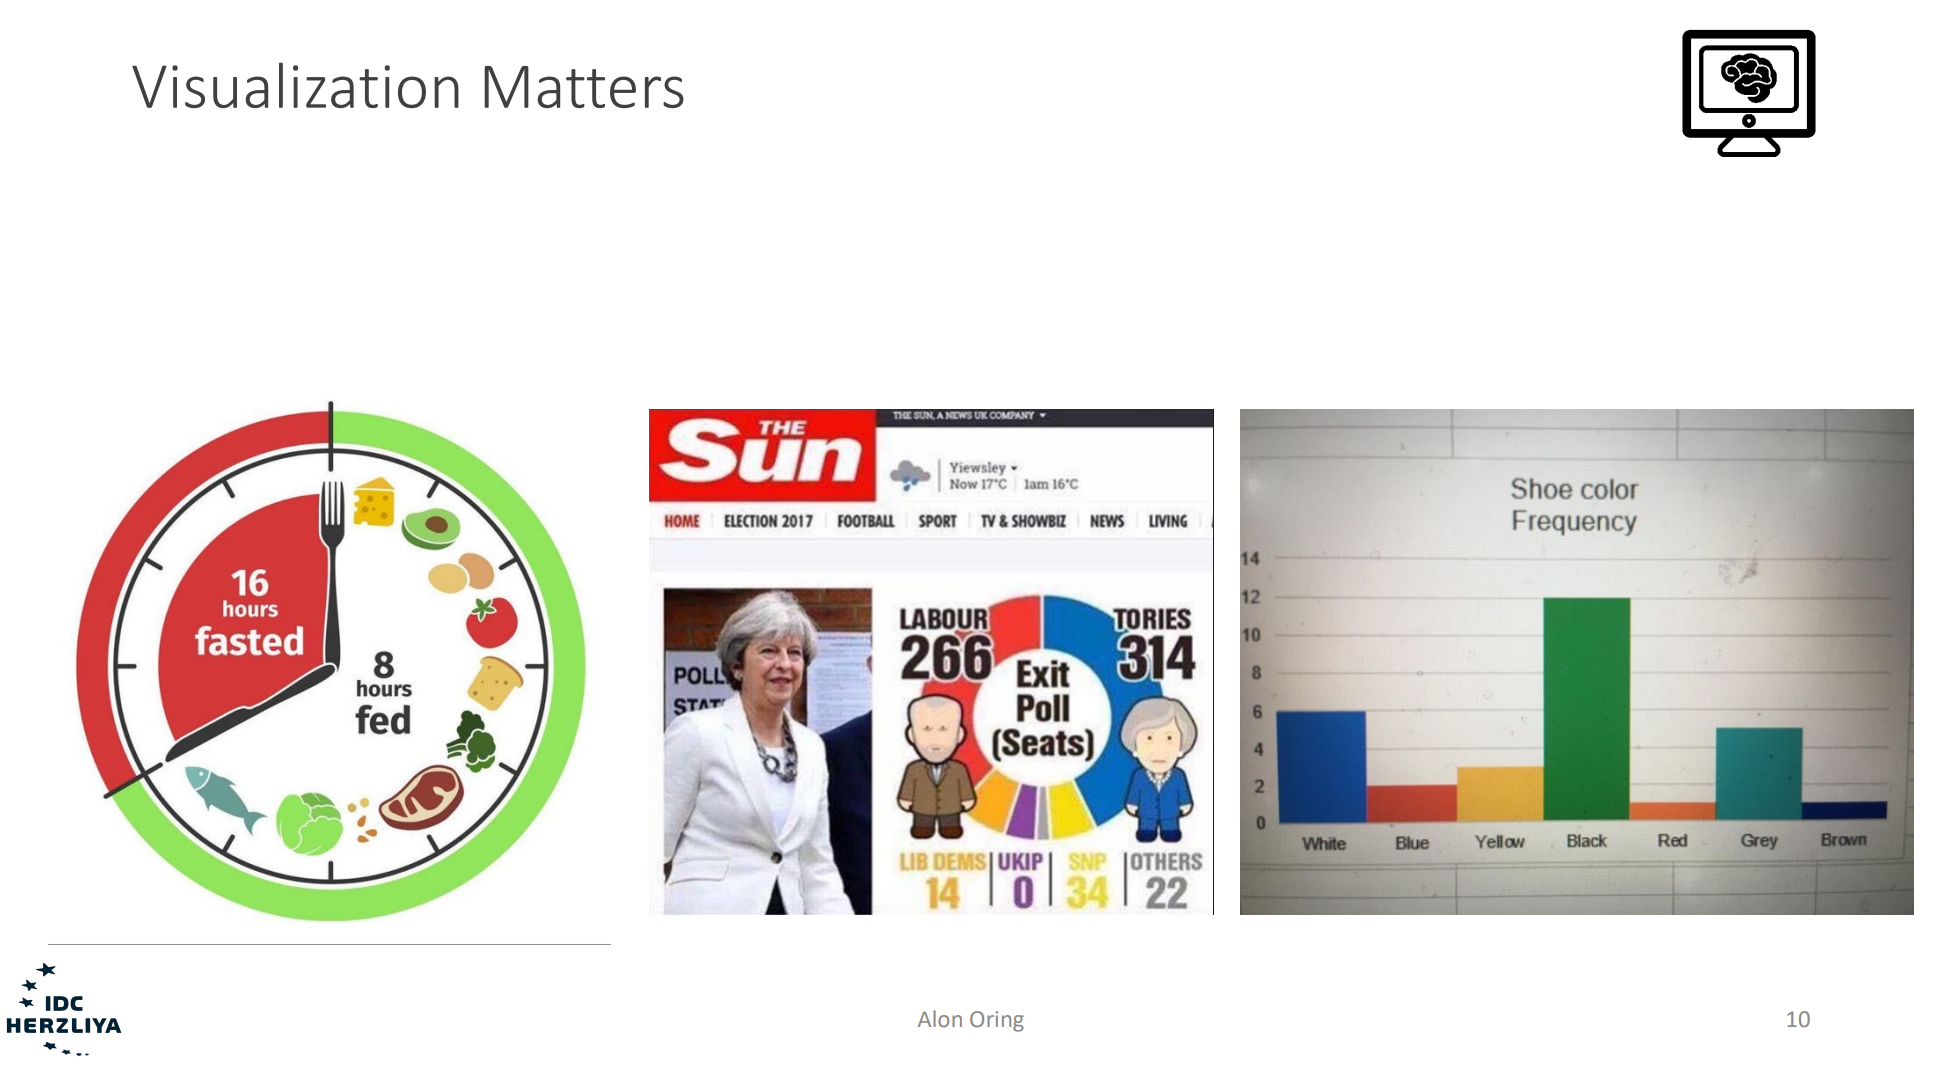

# Introduction to data visualization in Python

Now that we are certain that data visualization is important, we can officially introduce `matplotlib`. The `matplotlib` package provide a simple object oriented API for figure manipulation: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

The basic **objects** matplotlib provides are as follows:
1. Figure: The **whole** figure. The figure keeps track of all the child `Axes`, which are figure elements such as lines, text, axis, polygons, etc. A figure can have any number of Axes, but to be useful should have at least one.
1. Axes: This is what you think of as 'a plot'. It is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. 
1. Axis: They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks).
1. Artist: Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). When the figure is rendered, all of the artists are drawn to the canvas which is a part of the figure.

Putting everything together we get:

<img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" width="450">

<img src="https://matplotlib.org/3.1.1/_images/anatomy.png" width='600'>

## Using Matplotlib
There are several ways to initiate a matplotlib figure. The simplest one is by using a layout manager called `subplots`. This method returns the figure and multiple axes. `subplots` positions the axes automatically and lets you access each axes using a list. 

In [ ]:
fig, ax = plt.subplots() # creates a figure with a single empty axes

Jupyter notebook will typically capture the matplotlib figure and present it without explictly calling `plt.show()`. To avoid issues with the plotting behavior, always use `%matplotlib inline` at the very top of the first cell of your notebook. Jupyter also lets you control the default size (in inches) of the figures by setting the figure size parameter: `plt.rcParams['figure.figsize'] = [6, 4]`.

In [ ]:
print("Figure: ", fig)
print("Axes: ", ax)

In [ ]:
fig, ax = plt.subplots(2)
print("Figure: ", fig)
print("Axes list: ", ax)
print("Axes 0: ", ax[0])

## Basic Plots

We will start by creating a figure with two axes, and populate it incrementally.

In [ ]:
fig, ax = plt.subplots(3,4)

In [ ]:
ax.shape

First, we need to define the data that will be used. The numpy method `linspace` can create evenly spaced numbers over a specified interval, which is perfect for many visualization needs.

In [ ]:
x = np.linspace(-10, 10, 10)
x

Next, we will access one of the axes objects, and create a basic $y$ versus $x$ plot as mixture of lines and markers. Note that plots are highly customizable. Check the [docs](https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html) for more information.

In [ ]:
ax[0][0]

In [ ]:
ax[0][0].plot(x, x ** 3, color='r', marker='*', markersize=8, linewidth=2); # populating the axes

if the figure is defined in a different cell in the Jupyter Notebook, call the figure object again to plot.

In [ ]:
fig

We will add a plot to the second axes, and call figure again to see the result.

In [ ]:
ax[0][1].plot(x, x ** 2, color='g', marker='o', markersize=14, linewidth=5); # populating the axes
fig

Once a plot has been drawn, it is possible to access the axes again and add objects to the axes. Note, this does **not** replace the previous drawing.

In [ ]:
ax[0][0].plot(x[::-1], x ** 3, color='r', marker='^', markersize=20, linewidth=2);
fig

It is possible to add a completely different object to the canvas.

In [ ]:
ax[0][1].annotate('global min', xy=(0, 0), xytext=(0, 60), size=20,
             arrowprops=dict(facecolor='black'));
fig

Calling `annotate` again will add another annotation to the figure.

In [ ]:
ax[0][1].annotate('not a global min', xy=(x[8], x[8]**2), xytext=(6, 10), size=15,
             arrowprops=dict(facecolor='black'));
fig

Multiple plotting on the same axes can be done in several ways, and should be accompanied with a legend and additional visual aids such as titles, axis names, grids, etc.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

x = np.linspace(2, 4, 10)

# you can add an arbitrary amount of x,y lines in one line  
axes[0].plot(x, x, x, x*np.log(x), x, x**2, x, np.exp(x))
# adding a title to the axes
axes[0].set_title("Normal scale")
# adding a legend
axes[0].legend(['x','x log(x)','x^2','e^x']);
# adding a grid
axes[0].grid(alpha=0.5, linestyle='dashed')

# a different approach and a logarithmic scale on the y axis
axes[1].plot(x, x, label='x')
axes[1].plot(x, x*np.log(x), label='x log(x)')
axes[1].plot(x, x**2, label='$x^2$')
axes[1].plot(x, np.exp(x), label='$e^x$')
axes[1].legend();
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

So far we only used the plot method that produces lines. There are many additional ways to visualize information.

In [ ]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

fig, axes = plt.subplots(2, 4, figsize=(16,8))

axes[0,0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0,0].set_title("Scatter")

axes[0,1].step(n, n**2, lw=2)
axes[0,1].set_title("Step")

axes[0,2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[0,2].set_title("Bar")

axes[0,3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[0,3].set_title("Fill");

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

axes[1,0].streamplot(X, Y, U, V, density=[0.5, 1])
axes[1,0].set_title("Steamplot")

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
axes[1,1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[1,1].set_title("Pie")

data = np.random.randn(100000)
axes[1,2].hist(data, cumulative=True, bins=50);
axes[1,2].hist(data, bins=50);
axes[1,2].set_title("Histogram")

year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
player1 = [8,10,17,15,23,18,24,29]
player2 = [10,14,19,16,25,20,26,32]
player3 = [12,17,21,19,26,22,28,35]

axes[1,3].stackplot(year, player1, player2, player3, colors = ['g','r', 'b'])
axes[1,3].set_title("Stackplots");

You can mix several visualization types on the same axes.

In [ ]:
x = np.linspace(-0.75, 1., 100)
y = x + 0.25*np.random.randn(len(xx))
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(x, y)
ax.plot(x,x, c='r', linewidth=4)
ax.plot(x,0.5*x, c='g', linewidth=4)
ax.fill_between(x, x, 0.5*x, color="blue", alpha=0.1);

In [ ]:
iris = sns.load_dataset("iris")
x = iris['sepal_length']
y = iris['petal_length']
g = sns.JointGrid(x, y, space=0)
g = g.plot_joint(sns.scatterplot, cmap="Blues_d")
sns.kdeplot(x, color="b", shade=True, bw=0.1, ax=g.ax_marg_x)
sns.kdeplot(y, color="r", shade=True, bw=0.1, vertical=True, ax=g.ax_marg_y)

In [ ]:
sns.jointplot(x="sepal_length", y="petal_length", data=iris, marginal_kws=dict(bins=20));

## Advanced Plotting

Some visualization capabilities are limited when using a layout manager. Enhanced control over the figure is available via the method `add_axes`. This method requires us to define the location of the axes using 4 numbers in the following format `[x,y,width,height]`. Note that this approach does not automatically create a grid of subplots, but adds axes on the same drawing canvas and allows for far richer visualizations. 

In [ ]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([0, 0.5, .4, .4], polar=True)
ax3 = fig.add_axes([0.6, 0.1, .4, .4], polar=True)

t = np.linspace(0, 2 * np.pi, 100)
ax1.plot(t, t, color='blue', lw=3);
ax2.plot(t, t, color='blue', lw=3);
ax3.plot(t[::-1], t, color='blue', lw=3);

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])

x = np.random.exponential(size=500)

ax1.scatter(x, x + 0.25*np.random.randn(len(x)))
ax1.plot(x,x, c='r', linewidth=4)
ax1.set_xlim(0,4)
ax1.set_ylim(0,4)

ax2 = fig.add_axes([0,-0.15,1,0.1])
ax2.hist(x, bins=15);
ax2.set_frame_on(False)
ax2.set_xlabel("Histogram")

ax3 = fig.add_axes([0,0.5,0.5,0.5])
labels = ['<2', '>=2']
ax3.pie([(x<2).sum(), (x>=2).sum()], labels=labels, autopct='%i%%', startangle=90);

If we don't care about the exact position of the axes, we can use `subplots`. 

## Advanced grids

There are more advanced layout managers that offer enhanced functionality. For example `subplot2grid` and `GridSpec`. You can learn more about them from the [documentation](https://matplotlib.org/tutorials/intermediate/gridspec.html).

In [ ]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

# Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics while keeping the advanced configurations hidden from the user. 

[seaborn official](https://seaborn.pydata.org)

### Why Seaborn?

While matplotlib is a great visulaization tool, it is a pretty old one. And nowdays it lacks a more aesthetic flavor and  a quicker interface into interacting with the `pandas` module, and specifically the DataFrame object. This is where the `seaborn` module blossom.  

In [ ]:
# We start of by importing our relevant modules, seaborn is usually aliased `sns`
import seaborn as sns

In [ ]:
tips = sns.load_dataset('tips')
fmri = sns.load_dataset("fmri")
iris = sns.load_dataset("iris")

In [ ]:
tips

## Boxplot

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

In [ ]:
sns.boxplot(x="day", y="tip", data=tips);

It is also possible to use the default Seaborn formatting.

In [ ]:
sns.set()

In [ ]:
fmri

In [ ]:
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker", data=tips);

In [ ]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="swarm", data=tips);

In [ ]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="violin", split=True, data=tips);

In [ ]:
sns.jointplot(x="sepal_length", y="petal_length", data=iris);

In [ ]:
sns.pairplot(data=iris, hue="species");

## Pairwise correlations

Calculating pairwise correlations is a common practice and thus has a built-in function in Pandas. `df.corr()` calculates the correlations between every pair of features in the dataset and the Seaborn method `heatmap` can make sense of the data.

In [ ]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df.corr()

In [ ]:
df["cyl_x2"] = df["cyl"] * 2
df.corr()

In [ ]:
sns.heatmap(df.corr(), cmap='RdYlBu', annot=True)

In [ ]:
sns.heatmap(df.corr()**2, cmap='RdYlBu', annot=True)

## 3D Data

In [ ]:
# defining some interesting data
alpha = 0.7
phi_ext = 2 * np.pi * 0.
def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

In [ ]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 100) 
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xline[::3], yline[::3], zline[::3], cmap='Greens', s=40);

## Contour plots with projections

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

## Animations

In [ ]:
# credit to J.R. Johansson
from matplotlib import animation
from scipy.integrate import odeint
from numpy import cos, sin
from IPython.display import HTML

g = 9.82; L = 0.5; m = 0.1

def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [np.pi/2, np.pi/2, 0, 0]  # initial state
t = np.linspace(0, 10, 250) # time coordinates
x = odeint(dx, x0, t)    # solve the ODE problem

In [ ]:
# fig, ax = plt.subplots(figsize=(5,5))
fig = plt.figure();
ax = plt.axes();

ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])

pendulum1 = ax.plot([1], [1], color="red", lw=2)[0]
pendulum2 = ax.plot([1], [1], color="blue", lw=2)[0]

def update(n): 
#     n = frame counter
    # calculate the positions of the pendulums
    x1 = + L * sin(x[n, 0])
    y1 = - L * cos(x[n, 0])
    x2 = x1 + L * sin(x[n, 1])
    y2 = y1 - L * cos(x[n, 1])
    
    # update the line data
    pendulum1.set_data([0 ,x1], [0 ,y1])
    pendulum2.set_data([x1,x2], [y1,y2])
    return pendulum1, pendulum2,
    
anim = animation.FuncAnimation(fig, update, interval=50, frames=len(t), blit=True)
plt.close(fig)

In [ ]:
from IPython.display import HTML
HTML(anim.to_jshtml())

## Advanced Visualizations

Many packages extend the visualization possibilities immensely. Just use Google and you will probably find something that fits your needs.

In [ ]:
!pip install folium

In [ ]:
import folium
import folium.plugins as plugins
import numpy as np

np.random.seed(3141592)
initial_data = (
    np.random.normal(size=(100, 2)) * np.array([[1, 1]]) +
    np.array([[48, 5]])
)
move_data = np.random.normal(size=(100, 2)) * 0.01
data = [(initial_data + move_data * i).tolist() for i in range(100)]

weight = 1  # default value
for time_entry in data:
    for row in time_entry:
        row.append(weight)
        
m = folium.Map([48., 5.], zoom_start=6)
hm = plugins.HeatMapWithTime(data)
hm.add_to(m)
m

## Slope Chart

In [ ]:
import matplotlib.lines as mlines
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()


# Distributions

What is the underlying distribution of the data?

In [ ]:
df = pd.read_csv('distribution_data.csv')

In [ ]:
df.head(5)

In [ ]:
data1 = df[df['ID'] == 'DNA_AA']
data2 = df[df['ID'] == 'AA_AA']
data3 = df[df['ID'] == 'DNA_DNA']

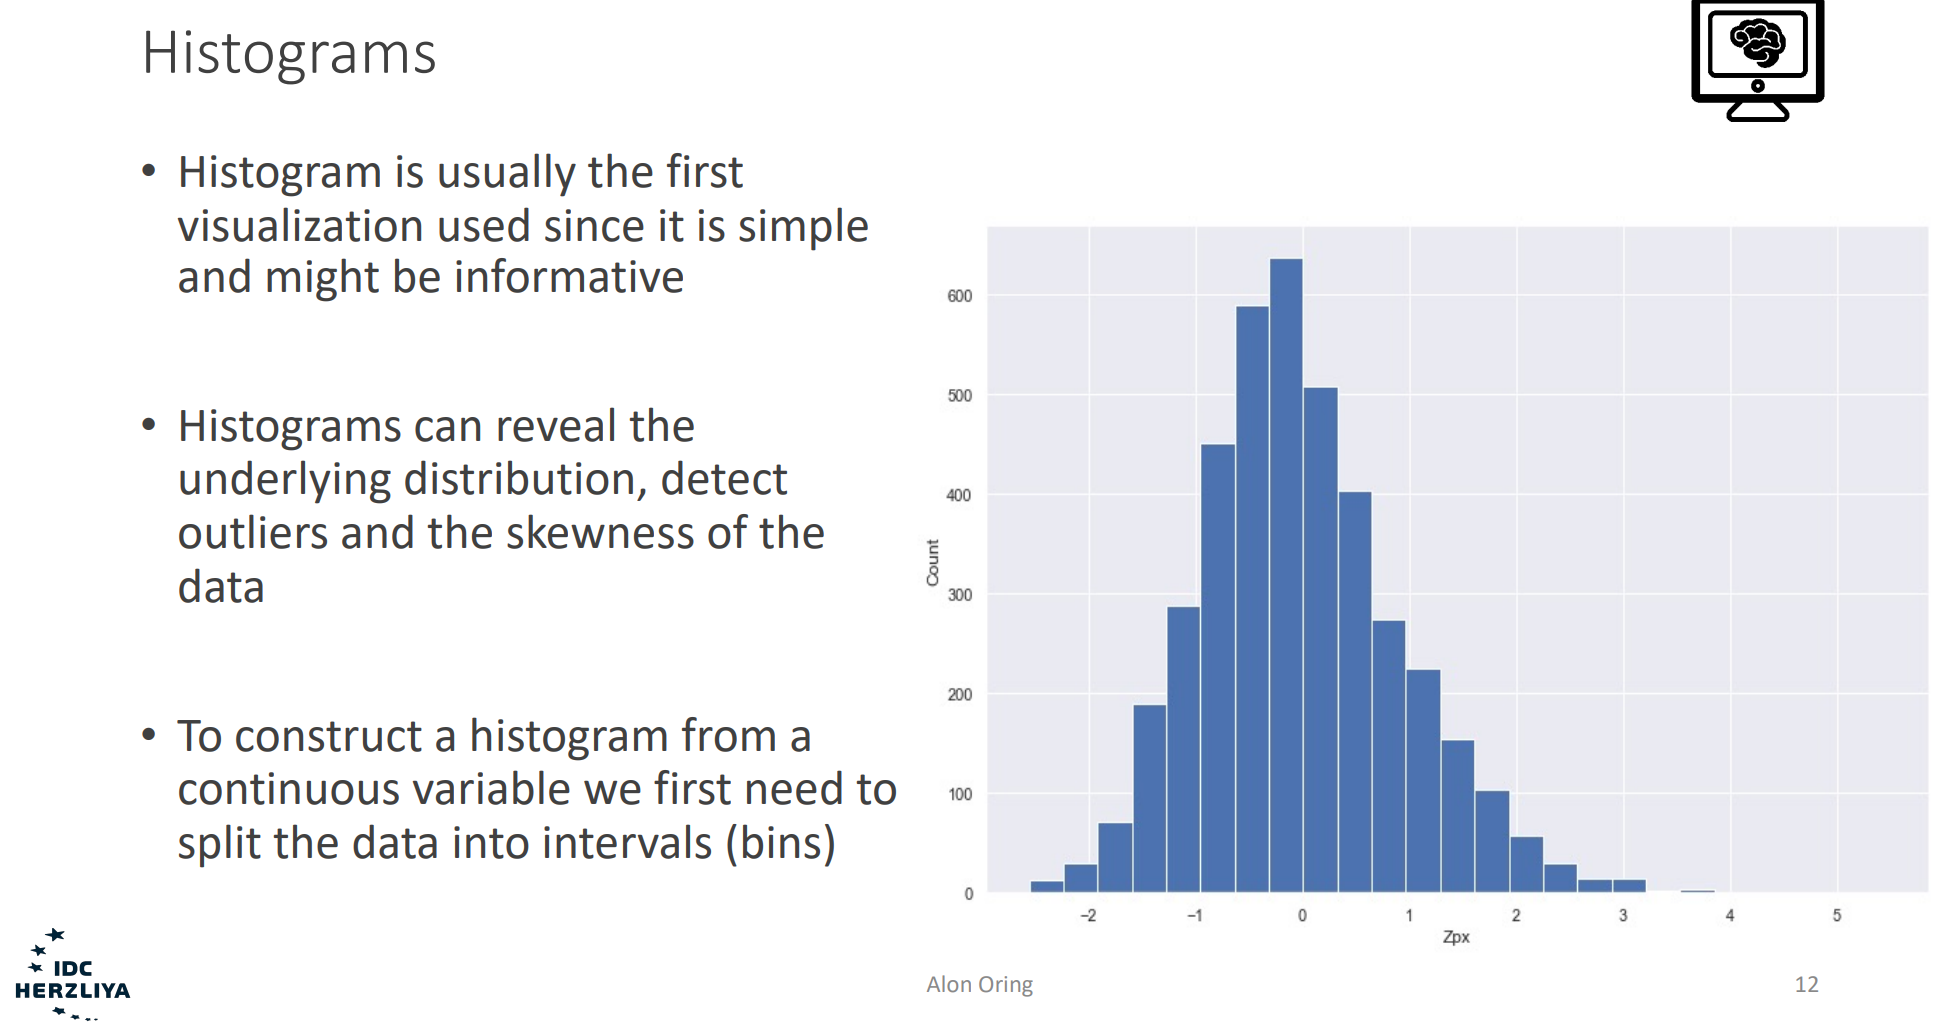

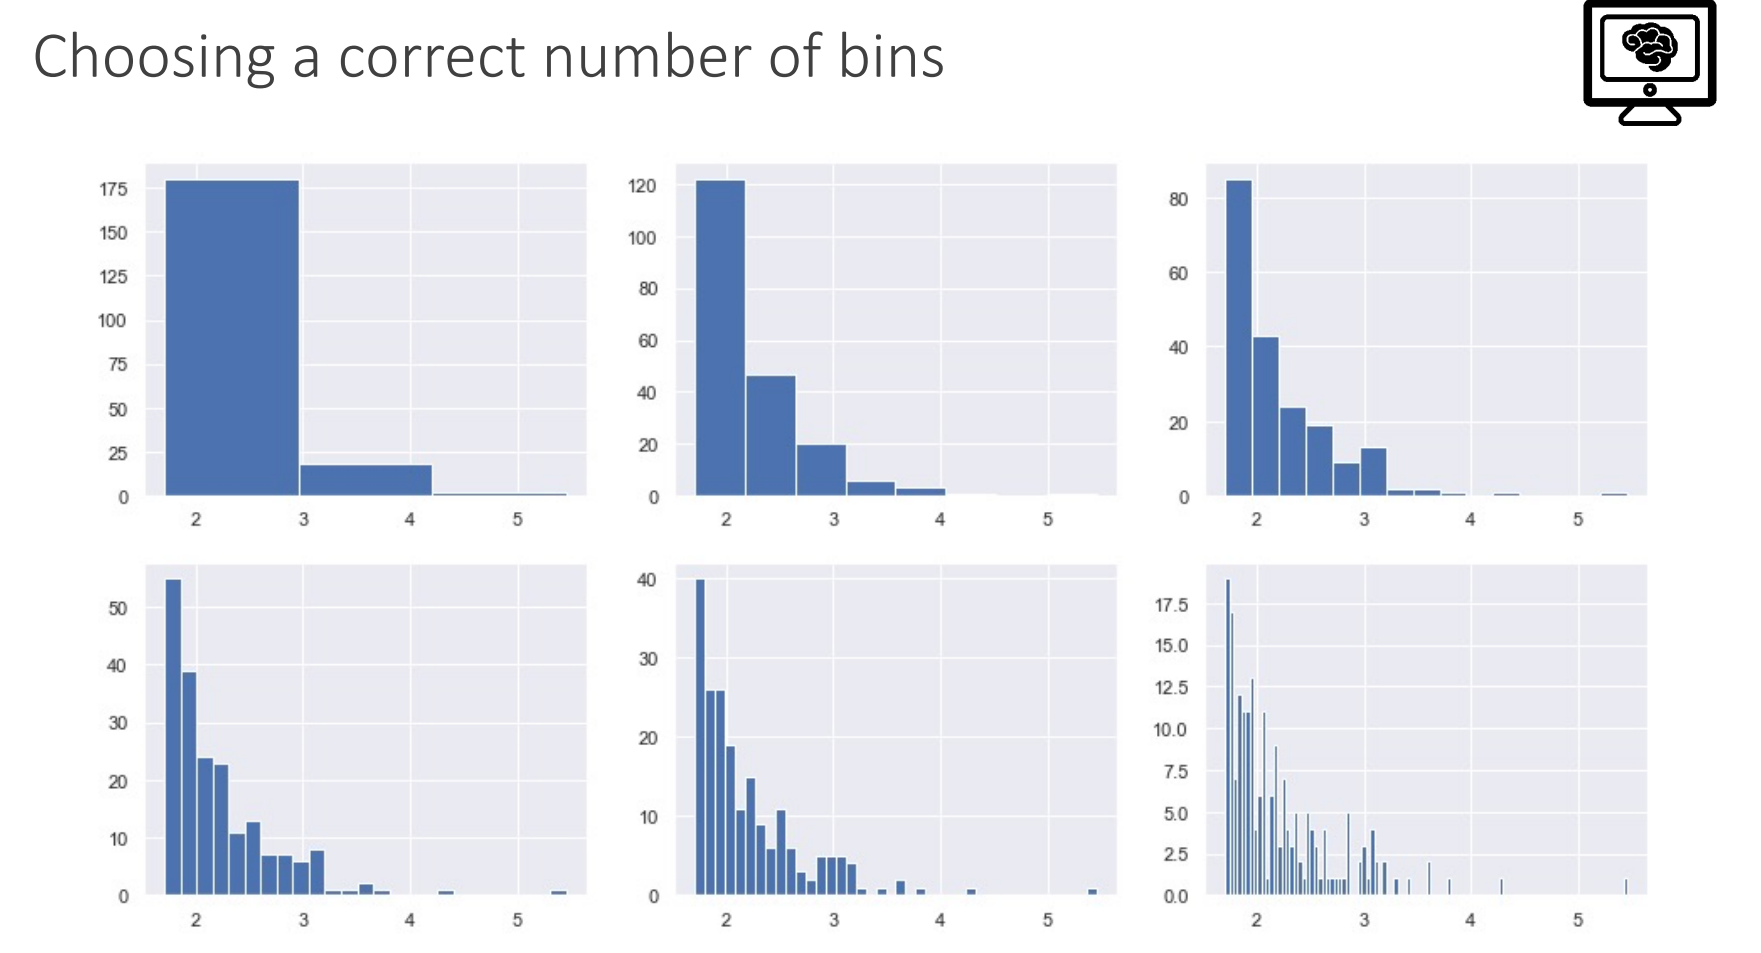

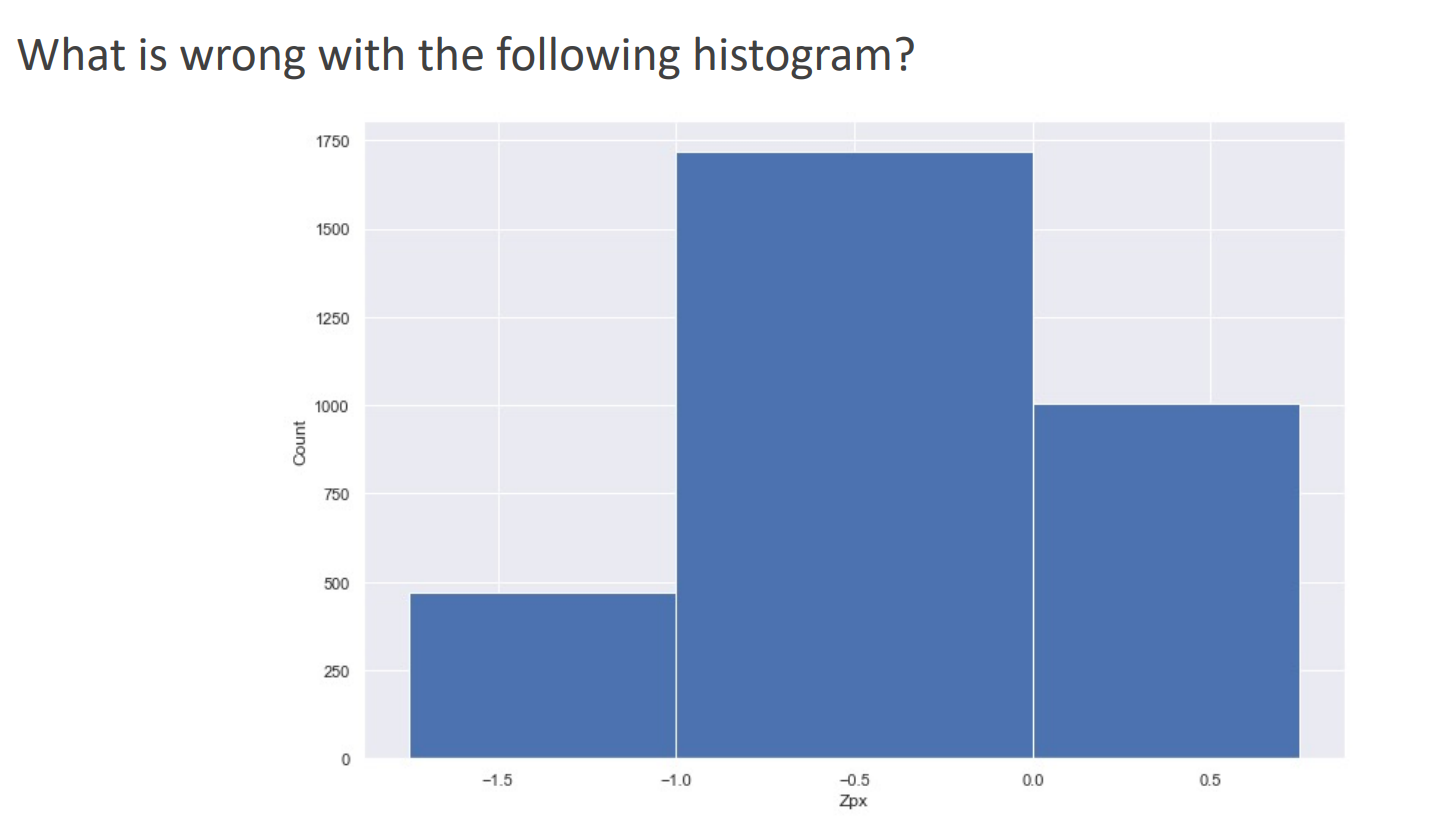

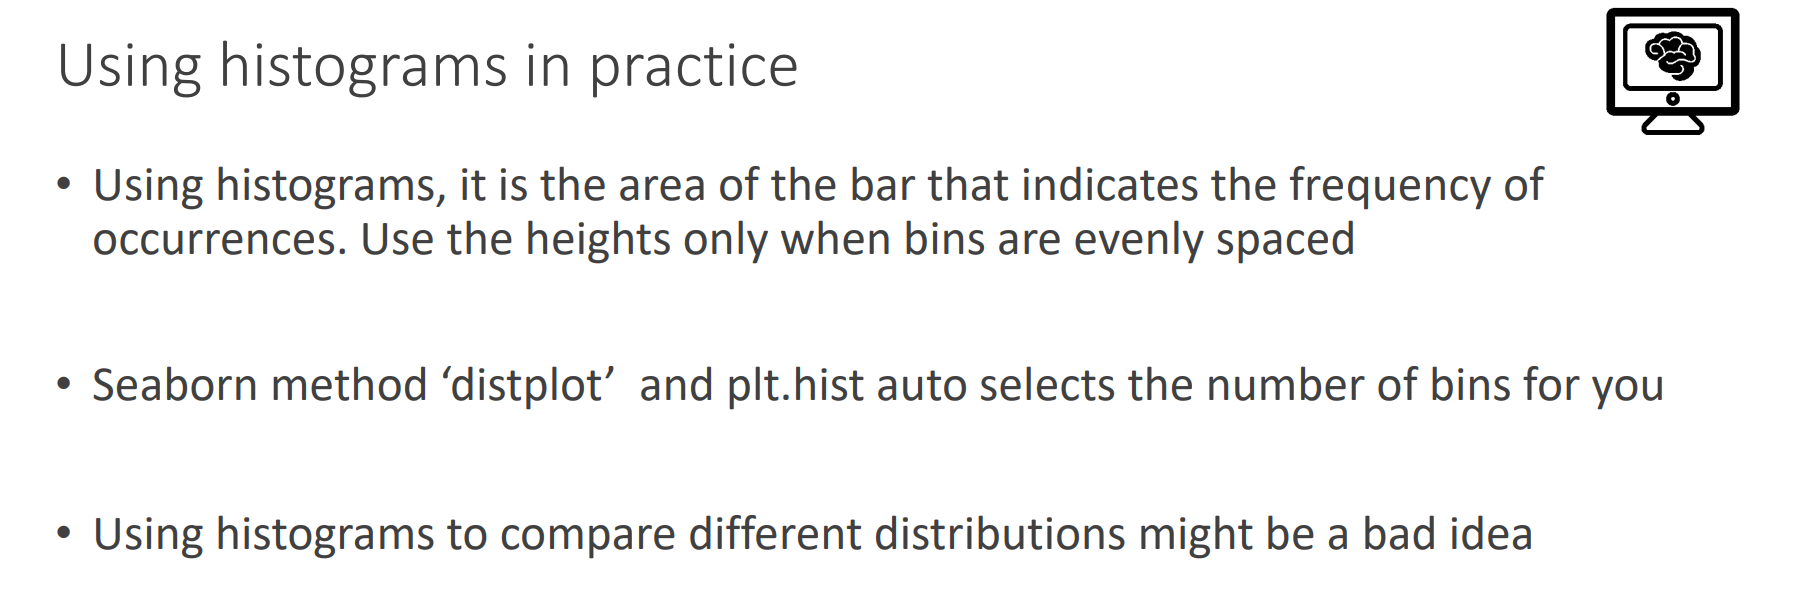

In [ ]:
# Using histograms to compare different distributions might be a bad idea
sns.distplot(data1['Zpx'], kde=False, rug=False);
sns.distplot(data2['Zpx'], kde=False, rug=False);
sns.distplot(data3['Zpx'], kde=False, rug=False);
plt.legend(labels=['legendEntry1', 'legendEntry2', 'legendEntry3'])

In [ ]:
sns.histplot(data1['Zpx'], stat='density', color="r", alpha=0.5, bins=30);
sns.histplot(data2['Zpx'], stat='density', color="g", alpha=0.5, bins=30);
sns.histplot(data3['Zpx'], stat='density', color="b", alpha=0.5, bins=30);
plt.legend(labels=['legendEntry1', 'legendEntry2', 'legendEntry3'])

In [ ]:
plt.hist(data1['Zpx']);
plt.xlabel("Zpx")
plt.ylabel("Count")

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
axes[0,0].hist(data1['Zpx'][:200], bins = 3);
axes[0,1].hist(data1['Zpx'][:200], bins = 8);
axes[0,2].hist(data1['Zpx'][:200], bins = 15);
axes[1,0].hist(data1['Zpx'][:200], bins = 25);
axes[1,1].hist(data1['Zpx'][:200], bins = 40);
axes[1,2].hist(data1['Zpx'][:200], bins = 100);

In [ ]:
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.hist([data1['Zpx'],data2['Zpx'],data3['Zpx']], bins = 50);
plt.tight_layout()

### Box Plots
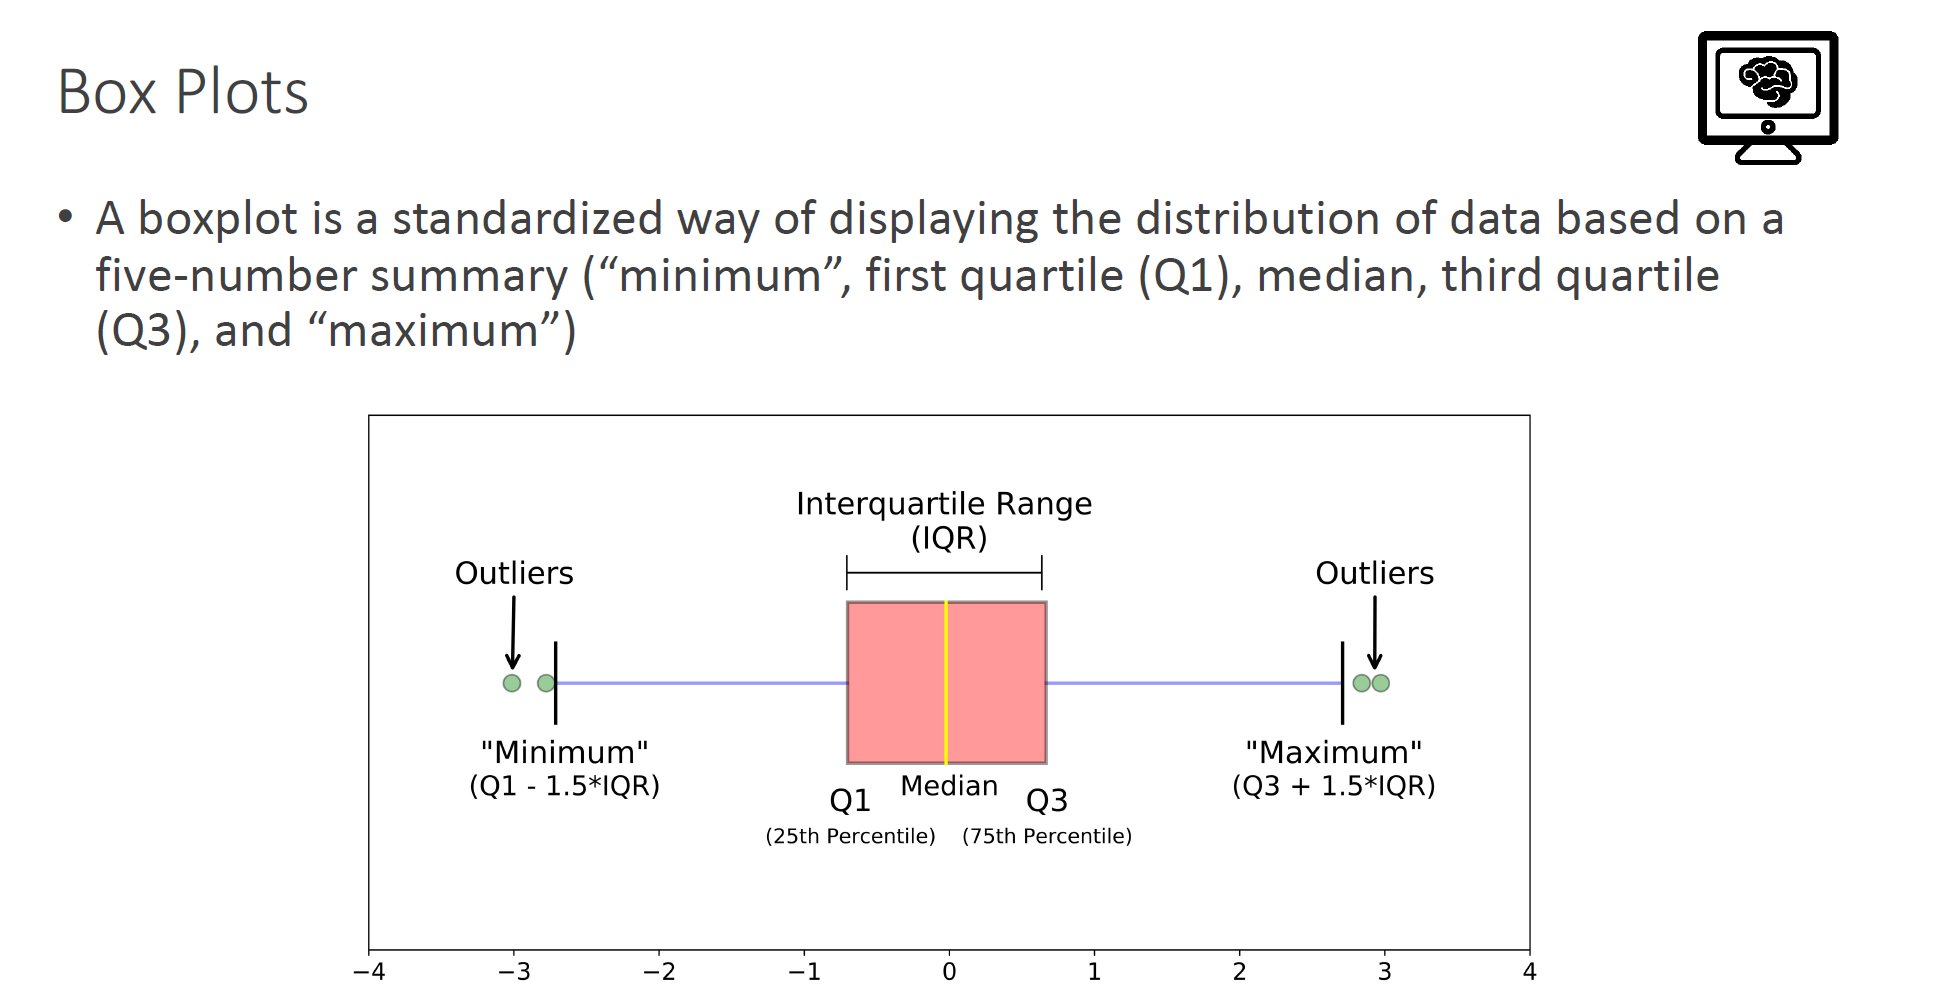

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(20,8))
a = np.random.randn(10000)
b = np.random.uniform(size=10000)
c = np.random.exponential(size=10000)
d = np.random.poisson(4, size=10000)

sns.boxplot(a, ax=axes[0,0])
sns.boxplot(b, ax=axes[0,1])
sns.boxplot(c, ax=axes[1,0])
sns.boxplot(d, ax=axes[1,1])

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(20,8))

sns.distplot(a, ax=axes[0,0], kde=False, axlabel='Normal')
sns.distplot(b, ax=axes[0,1], kde=False, axlabel='Uniform')
sns.distplot(c, ax=axes[1,0], kde=False, axlabel='Exponential')
sns.distplot(d, ax=axes[1,1], kde=False, axlabel='Poisson')

In [ ]:
fig, axes = plt.subplots(1, figsize=(20,8))
sns.set()
ax = sns.boxplot(x="Zpx", y="ID", data=df)

In [ ]:
sns.stripplot(x="ID", y="Zpx", data=df, jitter=True, alpha=0.6)

In [ ]:
params = dict(x='Zpx',
              y='ID')

p = sns.stripplot(data=df.sample(frac=0.05),
                  size=4,
                  jitter=0.35,
                  palette=['#91bfdb','#fc8d59', '#59fc8d'],
                  alpha=0.8,
                  edgecolor='black',
                  linewidth=1,
                  order=["DNA_AA", "AA_AA", "DNA_DNA"],
                  **params)
p_box = sns.boxplot(data=df, linewidth=2,**params)

In [ ]:
fig, ax = plt.subplots(1, figsize=(16,8))
sns.distplot(data1['Zpx'], hist=False)
sns.distplot(data2['Zpx'], hist=False)
sns.distplot(data3['Zpx'], hist=False)

In [ ]:
######################

In [ ]:
tips

In [ ]:
a = tips[tips['day'] == 'Sun']
b = tips[tips['day'] == 'Thur']
c = tips[tips['day'] == 'Fri']
d = tips[tips['day'] == 'Sat']

fig, ax = plt.subplots(1)
sns.distplot(a['tip'], ax=ax, hist=False)
sns.distplot(b['tip'], ax=ax, hist=False)
sns.distplot(c['tip'], ax=ax, hist=False)
sns.distplot(d['tip'], ax=ax, hist=False)

In [ ]:
fig, ax = plt.subplots(1)
sns.distplot([1,2,3,4,5,6,7,8,9,10]*1000, ax=ax, hist=True, kde=False, norm_hist=True, bins=10)
sns.distplot([1,2,3,4,5,6,7,8,9,10]*1000, ax=ax, hist=False)

In [ ]:
ax = sns.barplot(x="day", y="total_bill", data=tips)

In [ ]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_axes([0, 0.8, .4, .25])
ax2 = fig.add_axes([0, 0.4, .4, .4])
ax3 = fig.add_axes([0, 0, .4, .4])

sns.distplot(df[df['ID']=='AA_AA']['Zpx'], hist=False, ax=ax1)
sns.violinplot(x='Zpx', y='ID', data=df[df['ID']=='AA_AA'], inner='box', cut=1, ax=ax2)
sns.boxplot(x='Zpx', y='ID', data=df[df['ID']=='AA_AA'], ax=ax3)

ax1.set_ylim(-0.01,0.6)

ax1.set_xlim(-4,7)
ax2.set_xlim(-4,7)
ax3.set_xlim(-4,7)

ax1.set_xlabel("")
ax3.set_xlabel("")

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off

ax2.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off

ax3.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off


ax1.grid(axis='y')



In [ ]:
fig, ax = plt.subplots(1,2)
sns.violinplot(x='ID', y='Zpx', data=df[df['ID']=='AA_AA'], inner='box', cut=1, ax=ax[1])
sns.boxplot(x='ID', y='Zpx', data=df[df['ID']=='AA_AA'], ax=ax[0])
plt.tight_layout()

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib notebook

fig, ax1 = plt.subplots(1)
ax = Axes3D(fig)

setosa = iris[iris['species'] == 'setosa']
versic = iris[iris['species'] == 'versicolor']
virgin = iris[iris['species'] == 'virginica']

ax.scatter(setosa['petal_length'], 
           setosa['sepal_length'], 
           c='grey',
          depthshade=True)

ax.scatter(versic['petal_length'], 
           versic['sepal_length'], 
           c='grey',
          depthshade=True)

ax.scatter(virgin['petal_length'], 
           virgin['sepal_length'], 
           c='grey',
          depthshade=True)


ax.scatter(setosa['petal_length'], 
           setosa['sepal_length'], 
           setosa['sepal_width'], 
           c='blue', depthshade=True)

ax.scatter(versic['petal_length'], 
           versic['sepal_length'], 
           versic['sepal_width'], 
           c='red', depthshade=True)

ax.scatter(virgin['petal_length'], 
           virgin['sepal_length'], 
           virgin['sepal_width'], 
           c='green', depthshade=True)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Sepal Length")
ax.set_zlabel("Sepal Width")